In [1]:
import community as community_louvain
import igraph as ig
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import networkx as nx

from networkx.algorithms import community as communitydetect
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, f1_score
from collections import Counter, defaultdict

In [2]:
# final kmatrix
with open('/Users/arjuns/Downloads/code_res_paper/paper-results-code/weisfeilerlehman/final_kernel_matrix/complete_kernel_matrix_v2.pkl', 'rb') as f:
    kmatrix = pickle.load(f)

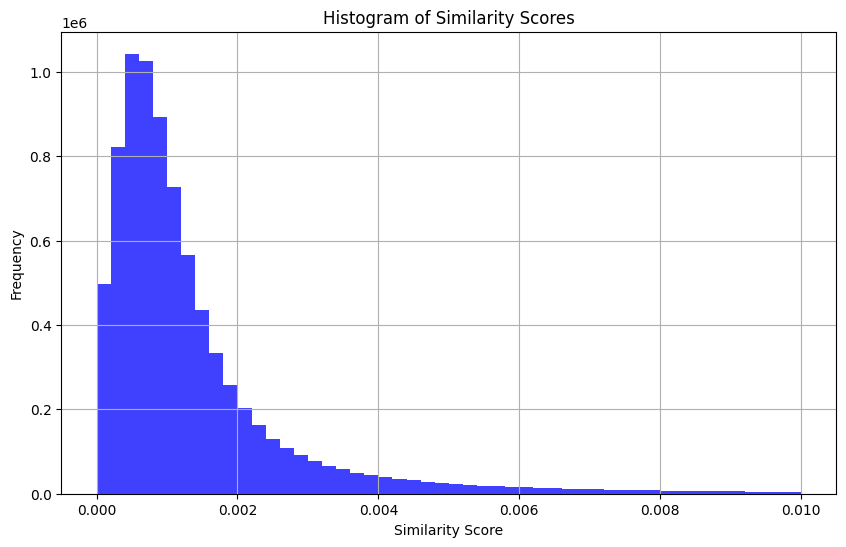

In [3]:
similarity_matrix = np.array(kmatrix)
similarity_matrix = (similarity_matrix + similarity_matrix.T) / 2

np.fill_diagonal(similarity_matrix, 0) # Remove self-similarities

# Flatten the matrix and remove zero values (self-similarities already removed)
similarity_scores = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]

plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=50, alpha=0.75, color='blue', range=(0, 0.01))
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [6]:
with open('./inflection_points.pkl', 'rb') as f:
    inflection_points = pickle.load(f)

In [7]:
bp = "/Users/arjuns/Downloads/notebooks_v2/v2/graphs"
list_of_files = glob.glob(f'{bp}/*/*.graphml')

files_with_no_nodes = [
    f'{bp}/Technology/learnmachinelearning.json.graphml',
    f'{bp}/Technology/DataHoarder.json.graphml',
    f'{bp}/Technology/talesfromtechsupport.json.graphml',
    f'{bp}/Technology/technews.json.graphml',
    f'{bp}/Technology/apolloapp.json.graphml',
    f'{bp}/Technology/ipad.json.graphml',
    f'{bp}/Technology/onions.json.graphml',
    f'{bp}/Technology/Windows10.json.graphml',
    f'{bp}/Art/AnalogCommunity.json.graphml',
    f'{bp}/Art/iWallpaper.json.graphml',
    f'{bp}/Art/ImaginaryHorrors.json.graphml',
    f'{bp}/Art/pic.json.graphml',
    f'{bp}/Art/ArtHistory.json.graphml',
    f'{bp}/Art/80s.json.graphml',
    f'{bp}/Art/Pyrography.json.graphml',
    f'{bp}/Art/blenderhelp.json.graphml',
    f'{bp}/Art/MobileWallpaper.json.graphml',
    f'{bp}/Art/wallpaperengine.json.graphml'
]
# Remove files with no nodes
list_of_files = [file for file in list_of_files if file not in files_with_no_nodes]

In [8]:
print(len(list_of_files))

4032


In [9]:
inflection_points

array([2.00200200e-05, 1.46146146e-03, 3.61361361e-03, 4.19419419e-03,
       4.82482482e-03, 5.20520521e-03, 5.49549550e-03, 5.99599600e-03,
       6.66666667e-03, 7.41741742e-03, 7.78778779e-03, 8.12812813e-03,
       8.55855856e-03, 9.21921922e-03, 9.65965966e-03, 4.80480480e-04,
       3.51351351e-03, 4.02402402e-03, 4.45445445e-03, 5.04504505e-03,
       5.33533534e-03, 5.73573574e-03, 6.28628629e-03, 7.17717718e-03,
       7.58758759e-03, 8.00800801e-03, 8.30830831e-03, 8.94894895e-03,
       9.42942943e-03, 9.89989990e-03, 4.76995214e-03, 4.00000000e-03])

In [10]:
inflection_points = [x for x in inflection_points if x not in [2.002002002002002e-05, 0.00048048048048048047, 0.0014614614614614613, 0.004]]

In [11]:
def name_processing(name):
    aux = name.split("/")
    return aux[-2] + "/" , aux[-1].split(".")[0]

graphs = {}
for threshold in inflection_points:
    print(f"Processing threshold: {threshold}")
    G = nx.Graph()

    for graph in list_of_files:
        topic, subreddit = name_processing(graph)
        G.add_node(graph)
        G.nodes[graph]['topic'] = topic
        G.nodes[graph]['subreddit'] = subreddit

    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            if similarity_matrix[i][j] > threshold:
                G.add_edge(list_of_files[i], list_of_files[j], weight=similarity_matrix[i][j])

    graphs[threshold] = G


Processing threshold: 0.0036136136136136134
Processing threshold: 0.004194194194194194
Processing threshold: 0.004824824824824825
Processing threshold: 0.005205205205205205
Processing threshold: 0.005495495495495496
Processing threshold: 0.005995995995995996
Processing threshold: 0.006666666666666666
Processing threshold: 0.007417417417417417
Processing threshold: 0.007787787787787787
Processing threshold: 0.008128128128128128
Processing threshold: 0.008558558558558558
Processing threshold: 0.009219219219219218
Processing threshold: 0.00965965965965966
Processing threshold: 0.0035135135135135136
Processing threshold: 0.004024024024024024
Processing threshold: 0.004454454454454454
Processing threshold: 0.005045045045045045
Processing threshold: 0.005335335335335335
Processing threshold: 0.005735735735735736
Processing threshold: 0.006286286286286286
Processing threshold: 0.007177177177177177
Processing threshold: 0.007587587587587588
Processing threshold: 0.008008008008008008
Processing

In [62]:
# save these graphs in ../l2_graphs/
for threshold, G in graphs.items():
    print(f"Saving graph for threshold: {threshold}")
    nx.write_graphml(G, f'../l2_graphs/{threshold}.graphml')

Saving graph for threshold: 0.0036136136136136134
Saving graph for threshold: 0.004194194194194194
Saving graph for threshold: 0.004824824824824825
Saving graph for threshold: 0.005205205205205205
Saving graph for threshold: 0.005495495495495496
Saving graph for threshold: 0.005995995995995996
Saving graph for threshold: 0.006666666666666666
Saving graph for threshold: 0.007417417417417417
Saving graph for threshold: 0.007787787787787787
Saving graph for threshold: 0.008128128128128128
Saving graph for threshold: 0.008558558558558558
Saving graph for threshold: 0.009219219219219218
Saving graph for threshold: 0.00965965965965966
Saving graph for threshold: 0.0035135135135135136
Saving graph for threshold: 0.004024024024024024
Saving graph for threshold: 0.004454454454454454
Saving graph for threshold: 0.005045045045045045
Saving graph for threshold: 0.005335335335335335
Saving graph for threshold: 0.005735735735735736
Saving graph for threshold: 0.006286286286286286
Saving graph for th

In [12]:
# do a sanity check on whether all graph nodes attributes are non -empty
for threshold, G in graphs.items():
    for node in G.nodes:
        if G.nodes[node] == {}:
            print(f"Empty node found in graph with threshold {threshold}")
            break
    print(f"Graph with threshold {threshold} is ok")

Graph with threshold 0.0036136136136136134 is ok
Graph with threshold 0.004194194194194194 is ok
Graph with threshold 0.004824824824824825 is ok
Graph with threshold 0.005205205205205205 is ok
Graph with threshold 0.005495495495495496 is ok
Graph with threshold 0.005995995995995996 is ok
Graph with threshold 0.006666666666666666 is ok
Graph with threshold 0.007417417417417417 is ok
Graph with threshold 0.007787787787787787 is ok
Graph with threshold 0.008128128128128128 is ok
Graph with threshold 0.008558558558558558 is ok
Graph with threshold 0.009219219219219218 is ok
Graph with threshold 0.00965965965965966 is ok
Graph with threshold 0.0035135135135135136 is ok
Graph with threshold 0.004024024024024024 is ok
Graph with threshold 0.004454454454454454 is ok
Graph with threshold 0.005045045045045045 is ok
Graph with threshold 0.005335335335335335 is ok
Graph with threshold 0.005735735735735736 is ok
Graph with threshold 0.006286286286286286 is ok
Graph with threshold 0.0071771771771771

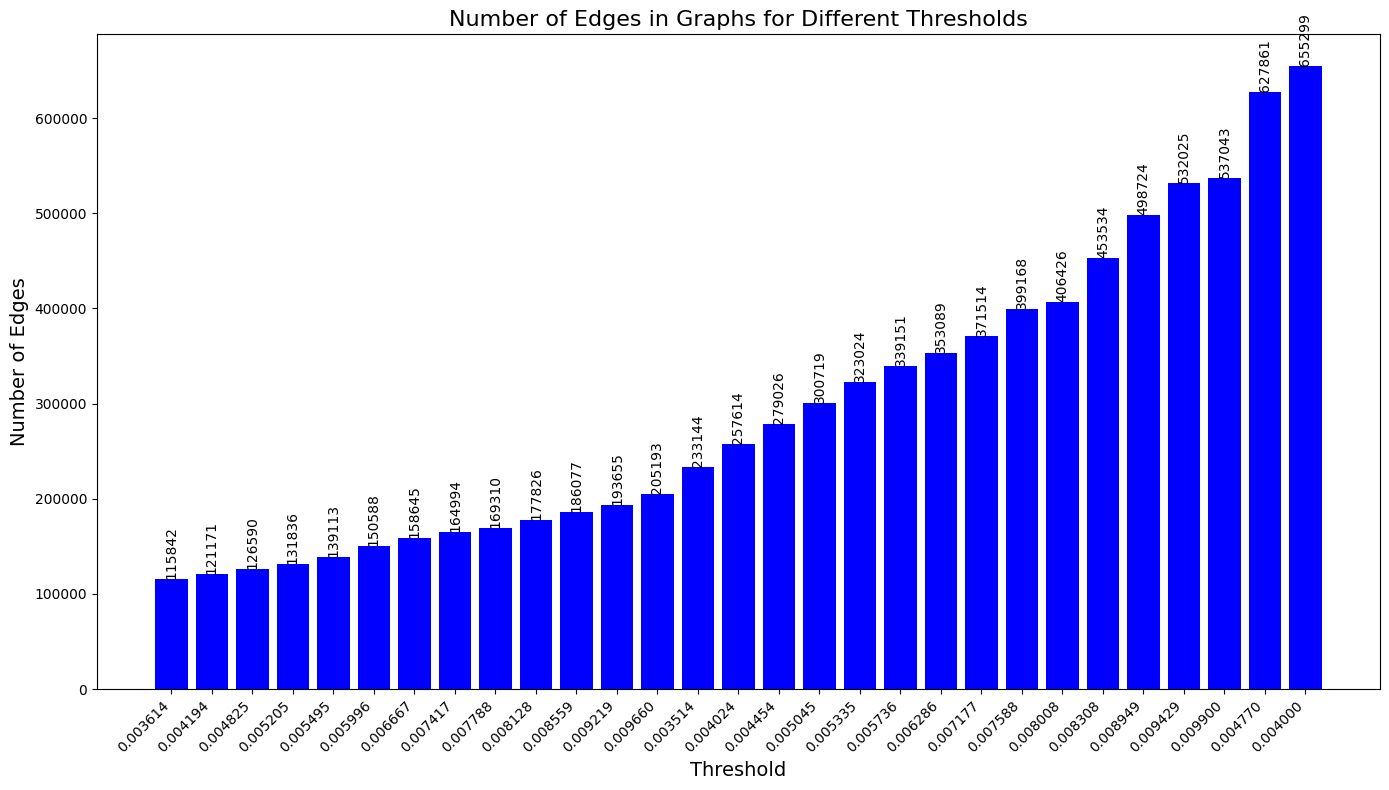

In [31]:
# inflection_test_points = np.array([0.01281198, 0.01119356, 0.01498934, 0.01607281, 0.01590291, 0.01804706])

all_points = inflection_points

# Calculate the number of edges for each graph
edge_counts = sorted([len(graphs[threshold].edges) for threshold in all_points])

# Determine colors for each threshold point
colors = ['blue' if threshold in inflection_points else 'red' for threshold in all_points]

# Create a new figure with a larger size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(all_points)), edge_counts, color=colors)

# Add text labels to each bar for better visibility
for bar, count in zip(bars, edge_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', 
             ha='center', va='bottom', fontsize=10, color='black', rotation=90)

# Set the x-ticks and rotate them for better readability
plt.xticks(range(len(all_points)), [f"{point:.6f}" for point in all_points], rotation=45, ha='right', fontsize=10)

# Add labels and title with increased font size
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Number of Edges', fontsize=14)
plt.title('Number of Edges in Graphs for Different Thresholds', fontsize=16)

# Adjust the margins to prevent the x-tick labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()


In [23]:
graphs

{0.0036136136136136134: <networkx.classes.graph.Graph at 0x12090e050>,
 0.004194194194194194: <networkx.classes.graph.Graph at 0x1699fa710>,
 0.004824824824824825: <networkx.classes.graph.Graph at 0x1699fb250>,
 0.005205205205205205: <networkx.classes.graph.Graph at 0x1699fa8f0>,
 0.005495495495495496: <networkx.classes.graph.Graph at 0x1699fa0b0>,
 0.005995995995995996: <networkx.classes.graph.Graph at 0x1699fa740>,
 0.006666666666666666: <networkx.classes.graph.Graph at 0x1699fba90>,
 0.007417417417417417: <networkx.classes.graph.Graph at 0x1699f94e0>,
 0.007787787787787787: <networkx.classes.graph.Graph at 0x1699fb100>,
 0.008128128128128128: <networkx.classes.graph.Graph at 0x1699f8970>,
 0.008558558558558558: <networkx.classes.graph.Graph at 0x1699fb940>,
 0.009219219219219218: <networkx.classes.graph.Graph at 0x1699fa8c0>,
 0.00965965965965966: <networkx.classes.graph.Graph at 0x1699f9180>,
 0.0035135135135135136: <networkx.classes.graph.Graph at 0x1699fa470>,
 0.0040240240240240

In [13]:
true_categories = {
    list_of_files[i].split("/")[-1].split(".")[0] : list_of_files[i].split("/")[-2] for i in range(len(list_of_files))
}
true_categories

{'teenagersbuthot': 'Internet Culture and Memes',
 'AsbestosRemovalMemes': 'Internet Culture and Memes',
 'sadlygokarts': 'Internet Culture and Memes',
 'peopleofwalmart': 'Internet Culture and Memes',
 'ani_bm': 'Internet Culture and Memes',
 'memesopdidnotlike': 'Internet Culture and Memes',
 'LTB_iel': 'Internet Culture and Memes',
 'MAAU': 'Internet Culture and Memes',
 'oddlymesmerizing': 'Internet Culture and Memes',
 'schizoposters': 'Internet Culture and Memes',
 'okbuddyphd': 'Internet Culture and Memes',
 'FindTheSniper': 'Internet Culture and Memes',
 'AllThatIsInteresting': 'Internet Culture and Memes',
 'VeryExpensive': 'Internet Culture and Memes',
 'whereintheworld': 'Internet Culture and Memes',
 'antimeme': 'Internet Culture and Memes',
 'Indiangirlsontinder': 'Internet Culture and Memes',
 'BLAHAJ': 'Internet Culture and Memes',
 'Daniellarson': 'Internet Culture and Memes',
 'evilbuildings': 'Internet Culture and Memes',
 'xkcd': 'Internet Culture and Memes',
 'ThatP

In [14]:
def community_detection_louvain(G):
    partition = community_louvain.best_partition(G)
    sorted_partition = sorted(partition.items(), key=lambda kv: kv[1])
    partition_dict = {}
    for k, v in sorted_partition:
        if v not in partition_dict:
            partition_dict[v] = []
        partition_dict[v].append(k)
    
    return partition_dict 
def community_detection_girvan_newman(G):
    communities_generator = communitydetect.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    sorted(map(sorted, next_level_communities))
    partition_dict = {}
    for i, community in enumerate(next_level_communities):
        for node in community:
            if i not in partition_dict:
                partition_dict[i] = []
            partition_dict[i].append(node)
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    
    return partition_dict


In [15]:
def community_detection_label_propagation(G):
    communities = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    communities_list = list(communities)
    partition_dict = {}
    for i, community in enumerate(communities_list):
        partition_dict[i] = list(community)
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    return partition_dict
def community_detection_fast_greedy(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_fastgreedy()
    clusters = communities.as_clustering()
    partition_dict = {}
    for i, community in enumerate(clusters):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    
    return partition_dict

In [16]:
def community_detection_leading_eigenvector(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_leading_eigenvector()
    partition_dict = {}
    for i, community in enumerate(communities):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    return partition_dict
def community_detection_walktrap(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_walktrap()
    clusters = communities.as_clustering()
    partition_dict = {}
    for i, community in enumerate(clusters):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    
    return partition_dict

def community_detection_infomap(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_infomap()
    partition_dict = {}
    for i, community in enumerate(communities):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    return partition_dict

def community_detection_leiden(G):
    ig_graph = ig.Graph.from_networkx(G)

    partition = ig_graph.community_leiden( 
        objective_function='modularity',
        weights='weight',
        n_iterations=-1,
    )
    partition_dict = {}
    for i, community in enumerate(partition):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    return partition_dict

def community_detection_multilevel(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    partition = ig_graph.community_multilevel()
    partition_dict = {}
    for i, community in enumerate(partition):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    return partition_dict

def community_detection_optimal_modularity(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    partition = ig_graph.community_optimal_modularity()
    partition_dict = {}
    for i, community in enumerate(partition):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    return partition_dict

In [17]:
def remove_single_node_communities(partition):
    temp = {k: v for k, v in partition.items() if len(v) > 1}
    return temp, partition

def get_homogeneity_scores(partition_dict):
    mean_homogeneity = 0
    median_homogeneity = 0
    homogeneity_scores = {}
    for community_id, subreddits in partition_dict.items():
        categories = [true_categories[subreddit.split("/")[-1].split(".")[0]] for subreddit in subreddits if subreddit.split("/")[-1].split(".")[0] in true_categories]
        category_counts = Counter(categories)
        if category_counts:
            most_common_category, most_common_count = category_counts.most_common(1)[0]
            homogeneity = most_common_count / len(categories)
        else:
            homogeneity = 0

        homogeneity_scores[community_id] = homogeneity

    mean_homogeneity = np.mean(list(homogeneity_scores.values()))
    median_homogeneity = np.median(list(homogeneity_scores.values()))
    return mean_homogeneity, median_homogeneity


In [18]:
def calculate_community_metrics(partition_dict):
    true_labels = []
    predicted_labels = []
    y_true = []
    y_pred = []
    
    for comm_id, subreddits in partition_dict.items():
        comm_categories = []
        
        for subreddit in subreddits:
            sub_name = subreddit.split("/")[-1].split(".")[0]
            if sub_name in true_categories:
                true_cat = true_categories[sub_name]
                true_labels.append(true_cat)
                predicted_labels.append(comm_id)
                comm_categories.append(true_cat)
        
        if comm_categories:
            majority_category = Counter(comm_categories).most_common(1)[0][0]
            y_pred.extend([majority_category]*len(comm_categories))
            y_true.extend(comm_categories)
    
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    ari = adjusted_rand_score(true_labels, predicted_labels)
    f1 = f1_score(y_true, y_pred, average='macro') if y_true else 0.0
    
    return nmi, ari, f1

In [19]:
community_detection_algorithms = ['louvain', 'label_propagation', 'fast_greedy', 'leading_eigenvector', 'walktrap', 'infomap', 'leiden', 'multilevel'] #, 'girvan_newman', ]
# community_detection_algorithms = ['girvan_newman']

In [20]:
def validate_partition(G, partition):
    """ Ensure every node is covered exactly once in the partition. """
    all_nodes = set(G.nodes())
    covered_nodes = set()
    for community in partition:
        if not community:  # Skip empty communities if any
            continue
        community_set = set(community)
        if not covered_nodes.isdisjoint(community_set):
            raise ValueError("Overlap detected in communities")
        covered_nodes.update(community_set)

    if covered_nodes != all_nodes:
        raise ValueError("Partition does not cover all nodes")

In [22]:
graphs = {}

for threshold in inflection_points:
    # dummy graph will load the graph when processin    
    graphs[threshold] = nx.Graph()
    

In [24]:
import logging
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [25]:
# Define data structures for metrics
metrics = defaultdict(lambda: defaultdict(dict))
base_path = "../l2_graphs"

for threshold, G in graphs.items():
    G = nx.read_graphml(f"{base_path}/{threshold}.graphml")
    for algorithm in community_detection_algorithms:
    
        logger.info(f"Processing algorithm: {algorithm}, threshold: {threshold}")
        try:
            #Community detection first half
            if algorithm == 'louvain':
                partition = community_detection_louvain(G)
            elif algorithm == 'girvan_newman':
                partition = community_detection_girvan_newman(G)
            elif algorithm == 'label_propagation':
                partition = community_detection_label_propagation(G)
            elif algorithm == 'fast_greedy':
                partition = community_detection_fast_greedy(G)
            elif algorithm == 'leading_eigenvector':
                partition = community_detection_leading_eigenvector(G)
            elif algorithm == 'walktrap':
                partition = community_detection_walktrap(G)
            else:
                raise ValueError(f"Invalid algorithm: {algorithm}")
        except Exception as e:
            logger.error(f"Error in {algorithm} for threshold {threshold}: {e}")
            continue

        # Remove outliers
        # partition, original = remove_outliers(partition)
        partition, original = remove_single_node_communities(partition)

        if len(partition) <= 1:
            logger.warning(f"Skipping {algorithm} for threshold {threshold}: partition has 1 or fewer communities")
            continue

        # Calculate existing metrics
        mean_homogeneity, median_homogeneity = get_homogeneity_scores(partition)
        nmi, ari, f1 = calculate_community_metrics(partition)
        modularity = communitydetect.modularity(G, [list(v) for v in original.values()])

        metrics[algorithm][threshold]["modularity"] = modularity
        metrics[algorithm][threshold]["mean_homogeneity"] = mean_homogeneity
        metrics[algorithm][threshold]["median_homogeneity"] = median_homogeneity
        metrics[algorithm][threshold]["nmi"] = nmi
        metrics[algorithm][threshold]["ari"] = ari
        metrics[algorithm][threshold]["f1"] = f1

        logger.info(f"Metrics calculated for {algorithm} at threshold {threshold}")
        logger.info(f"Modularity: {modularity}, Mean Homogeneity: {mean_homogeneity}, Median Homogeneity: {median_homogeneity}")
        logger.info(f"NMI: {nmi}, ARI: {ari}, F1: {f1}")

logger.info("Processing completed for all algorithms and thresholds.")


2025-02-05 11:38:50,121 - INFO - Processing algorithm: louvain, threshold: 0.0036136136136136134
2025-02-05 11:39:24,332 - INFO - Metrics calculated for louvain at threshold 0.0036136136136136134
2025-02-05 11:39:24,339 - INFO - Modularity: 0.32670193800336916, Mean Homogeneity: 0.567524307286131, Median Homogeneity: 0.5973597359735974
2025-02-05 11:39:24,340 - INFO - NMI: 0.4552344961944519, ARI: 0.30738549615433614, F1: 0.3149692429101801
2025-02-05 11:39:24,340 - INFO - Processing algorithm: label_propagation, threshold: 0.0036136136136136134
2025-02-05 11:39:28,451 - WARNING - Skipping label_propagation for threshold 0.0036136136136136134: partition has 1 or fewer communities
2025-02-05 11:39:28,460 - INFO - Processing algorithm: fast_greedy, threshold: 0.0036136136136136134
2025-02-05 11:39:37,929 - INFO - Metrics calculated for fast_greedy at threshold 0.0036136136136136134
2025-02-05 11:39:37,930 - INFO - Modularity: 0.23556095736182484, Mean Homogeneity: 0.4682753347741673, Med

In [29]:
metrics_sh = defaultdict(lambda: defaultdict(dict))
base_path = "../l2_graphs"
for threshold, G in graphs.items():
    G = nx.read_graphml(f"{base_path}/{threshold}.graphml")

    for algorithm in community_detection_algorithms:
        if algorithm in ['louvain', 'label_propagation', 'fast_greedy', 'leading_eigenvector', 'walktrap']:
            continue
        logger.info(f"Processing algorithm: {algorithm}, threshold: {threshold}")
        try:
            # Community detection second half
            if algorithm == 'infomap':
                partition = community_detection_infomap(G)
            elif algorithm == 'leiden':
                partition = community_detection_leiden(G)
            elif algorithm == 'multilevel':
                partition = community_detection_multilevel(G)
            elif algorithm == 'optimal_modularity':
                partition = community_detection_optimal_modularity(G)
            else:
                raise ValueError(f"Invalid algorithm: {algorithm}")
        except Exception as e:
            logger.error(f"Error in {algorithm} for threshold {threshold}: {e}")
            continue

        if len(partition) <= 1:
            logger.warning(f"Skipping {algorithm} for threshold {threshold}: partition has 1 or fewer communities")
            continue
        # print(partition)
        partition, original = remove_single_node_communities(partition)

        # Calculate existing metrics
        mean_homogeneity, median_homogeneity = get_homogeneity_scores(partition)
        nmi, ari, f1 = calculate_community_metrics(partition)
        modularity = communitydetect.modularity(G, [list(v) for v in original.values()])

        metrics_sh[algorithm][threshold]["modularity"] = modularity
        metrics_sh[algorithm][threshold]["mean_homogeneity"] = mean_homogeneity
        metrics_sh[algorithm][threshold]["median_homogeneity"] = median_homogeneity
        metrics_sh[algorithm][threshold]["nmi"] = nmi
        metrics_sh[algorithm][threshold]["ari"] = ari
        metrics_sh[algorithm][threshold]["f1"] = f1

        logger.info(f"Metrics calculated for {algorithm} at threshold {threshold}")
        logger.info(f"Modularity: {modularity}, Mean Homogeneity: {mean_homogeneity}, Median Homogeneity: {median_homogeneity}")
        logger.info(f"NMI: {nmi}, ARI: {ari}, F1: {f1}")

logger.info("Processing completed for all algorithms and thresholds.")

2025-02-05 12:07:43,525 - INFO - Processing algorithm: infomap, threshold: 0.0036136136136136134
2025-02-05 12:08:00,803 - INFO - Metrics calculated for infomap at threshold 0.0036136136136136134
2025-02-05 12:08:00,805 - INFO - Modularity: 0.09693233368899007, Mean Homogeneity: 0.8003552409715734, Median Homogeneity: 0.8620689655172413
2025-02-05 12:08:00,806 - INFO - NMI: 0.40198357352068403, ARI: 0.10605560515438711, F1: 0.36711146294032815
2025-02-05 12:08:00,806 - INFO - Processing algorithm: leiden, threshold: 0.0036136136136136134
2025-02-05 12:08:03,685 - INFO - Metrics calculated for leiden at threshold 0.0036136136136136134
2025-02-05 12:08:03,693 - INFO - Modularity: 0.322985008014209, Mean Homogeneity: 0.5693398032049427, Median Homogeneity: 0.6107168930578293
2025-02-05 12:08:03,693 - INFO - NMI: 0.4824308278186658, ARI: 0.3444210716253757, F1: 0.3523667410249966
2025-02-05 12:08:03,694 - INFO - Processing algorithm: multilevel, threshold: 0.0036136136136136134
2025-02-05 

In [44]:
existing_metrics = dict(existing_metrics)

In [39]:
def dump_pickle(data, filepath):
    with open(filepath, 'wb') as f:
        pickle.dump(data, f)

def load_pickle(path):
    with open(path, 'rb') as f:
        return pickle.load(f)   

In [45]:
dump_pickle(existing_metrics, './metrics/cd_metrics.pkl')

In [46]:
print(existing_metrics.keys())

dict_keys(['louvain', 'fast_greedy', 'leading_eigenvector', 'walktrap', 'label_propagation', 'infomap', 'leiden', 'multilevel'])


['louvain', 'label_propagation']


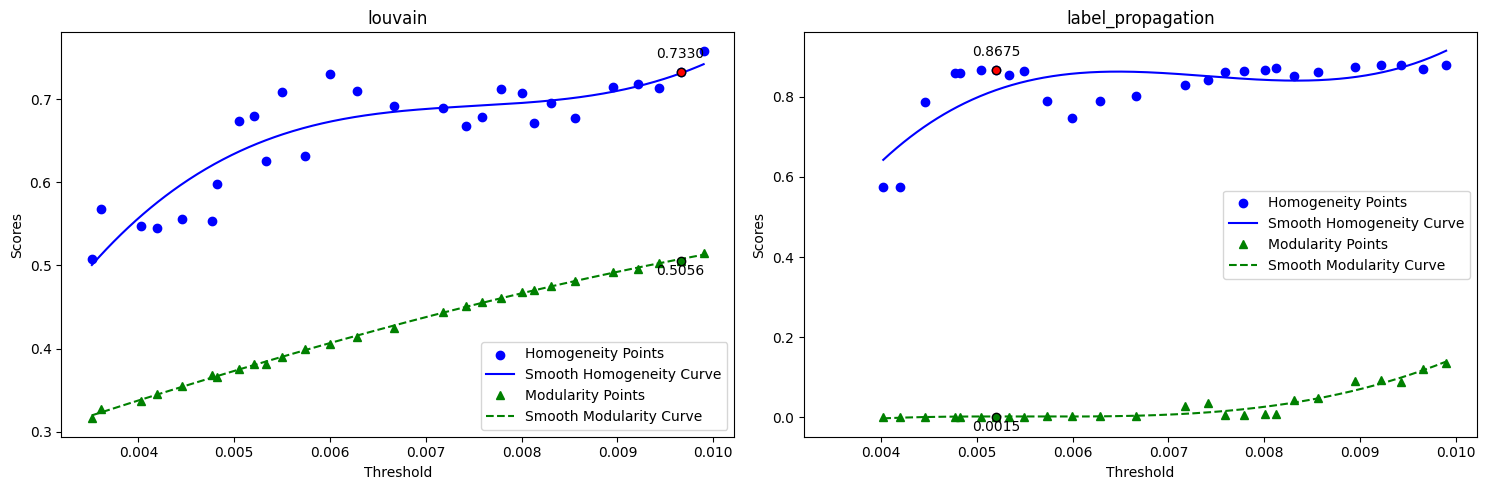

['fast_greedy', 'leading_eigenvector']


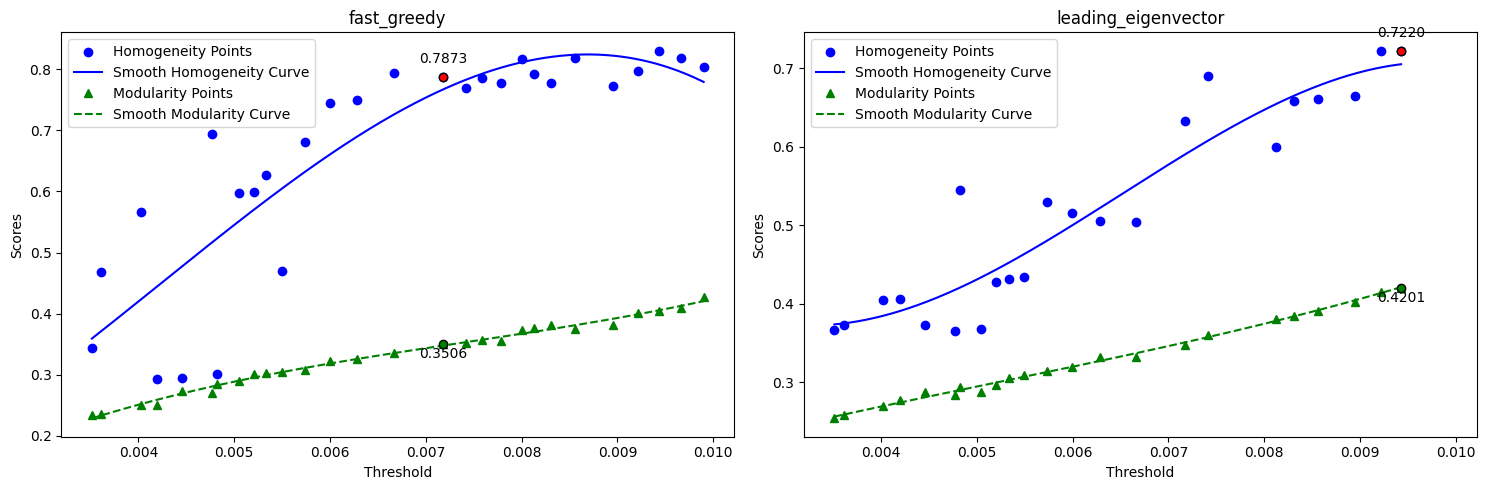

['walktrap', 'infomap']


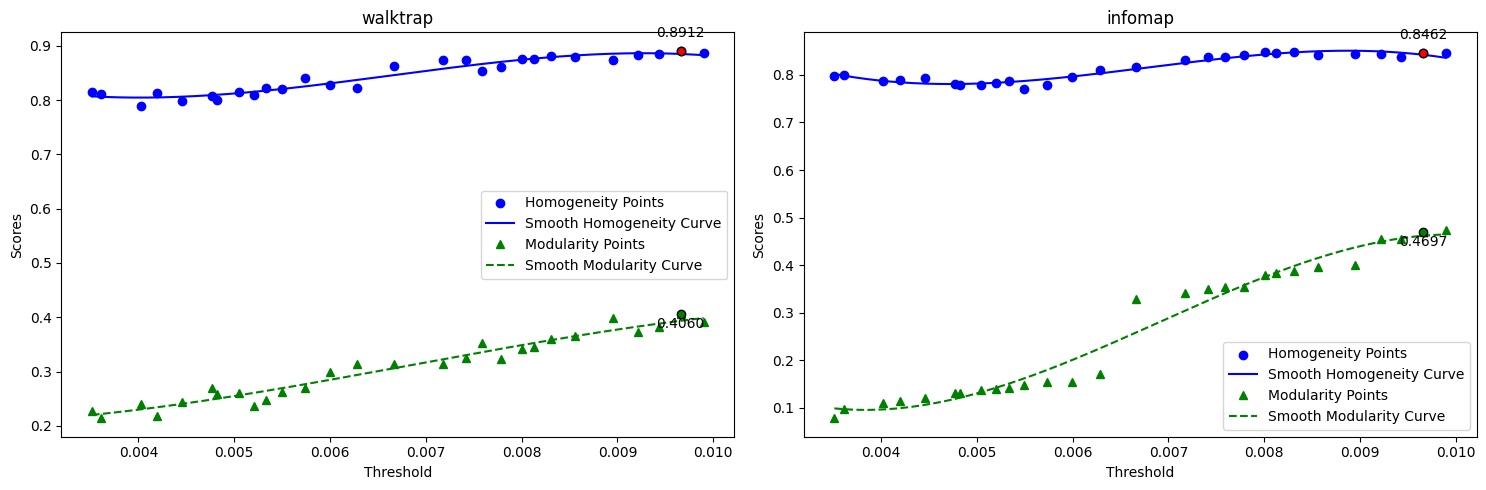

['leiden', 'multilevel']


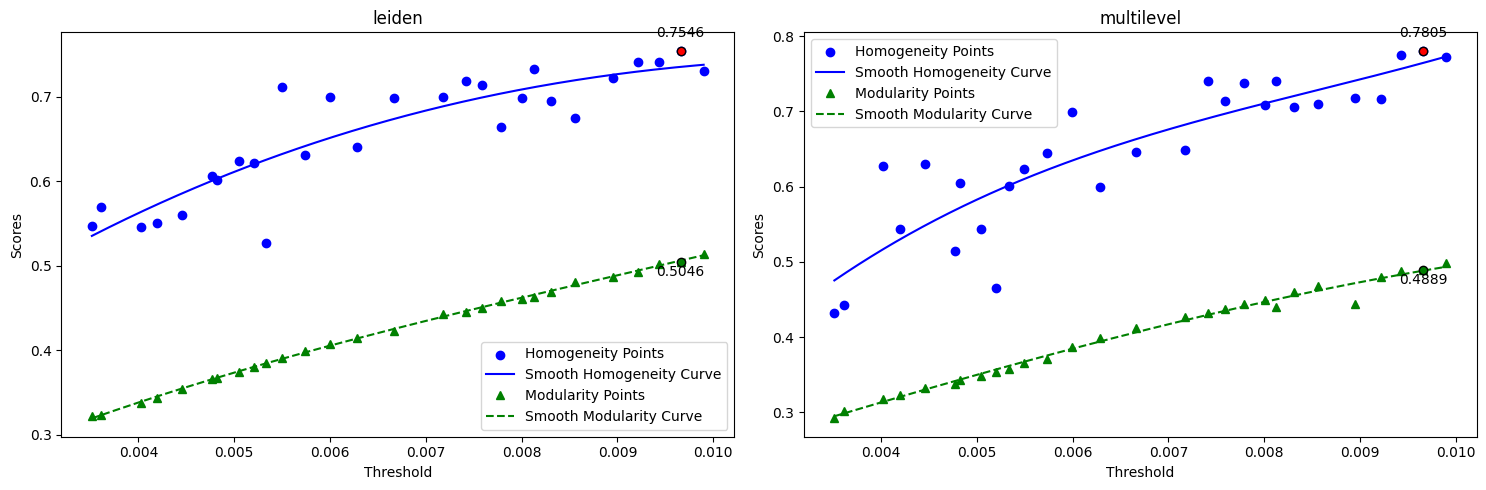

In [32]:
def plot(data, algorithms, target_threshold=[]):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=False)
    axes = axes.flatten()  # Flatten the array of axes for easier iteration

    print(algorithms)

    for idx, algo in enumerate(algorithms):
        thresholds = np.array(list(data[algo].keys()))
        homogeneities = np.array([data[algo][threshold]['mean_homogeneity'] for threshold in thresholds])
        modularities = np.array([data[algo][threshold]['modularity'] for threshold in thresholds])

        # Sorting data for plotting
        sorted_indices = np.argsort(thresholds)
        thresholds = thresholds[sorted_indices]
        homogeneities = homogeneities[sorted_indices]
        modularities = modularities[sorted_indices]

        # Fit a smooth line for homogeneity
        z_homogeneity = np.polyfit(thresholds, homogeneities, 3)  # Cubic polynomial
        p_homogeneity = np.poly1d(z_homogeneity)
        
        # Generate a smooth range of thresholds for smoother curve
        smooth_thresholds = np.linspace(thresholds.min(), thresholds.max(), 500)
        smooth_homogeneities = p_homogeneity(smooth_thresholds)

        # Fit a smooth line for modularity
        z_modularity = np.polyfit(thresholds, modularities, 3)  # Cubic polynomial
        p_modularity = np.poly1d(z_modularity)
        smooth_modularities = p_modularity(smooth_thresholds)

        # Plotting each algorithm's homogeneity data
        axes[idx].scatter(thresholds, homogeneities, color='blue', label='Homogeneity Points')
        axes[idx].plot(smooth_thresholds, smooth_homogeneities, 'b-', label='Smooth Homogeneity Curve')

        # Plotting each algorithm's modularity data
        axes[idx].plot(thresholds, modularities, 'g^', label='Modularity Points')
        axes[idx].plot(smooth_thresholds, smooth_modularities, 'g--', label='Smooth Modularity Curve')

        if target_threshold[idx] is not None and target_threshold[idx] in thresholds:
            tgt = target_threshold[idx]
            target_index = np.where(thresholds == tgt)[0][0]
            target_homogeneity = homogeneities[target_index]
            target_modularity = modularities[target_index]
            
            axes[idx].scatter(tgt, target_homogeneity, color='red', edgecolor='black', zorder=5)
            axes[idx].annotate(f'{target_homogeneity:.4f}', (tgt, target_homogeneity),
                               textcoords="offset points", xytext=(0,10), ha='center')

            # Optionally mark modularity at the target threshold
            axes[idx].scatter(tgt, target_modularity, color='green', edgecolor='black', zorder=5)
            axes[idx].annotate(f'{target_modularity:.4f}', (tgt, target_modularity),
                               textcoords="offset points", xytext=(0,-10), ha='center')

        axes[idx].set_title(algo)
        axes[idx].set_xlabel('Threshold')
        axes[idx].set_ylabel('Scores')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

# Example usage with target_threshold=0.0059
plot(existing_metrics, community_detection_algorithms[:2], target_threshold=[0.00965965965965966, 0.005205205205205205])
plot(existing_metrics, community_detection_algorithms[2:4], target_threshold=[0.007177177177177177, 0.009429429429429429])
plot(existing_metrics, community_detection_algorithms[4:6], target_threshold=[0.00965965965965966, 0.00965965965965966])
plot(existing_metrics, community_detection_algorithms[6:8], target_threshold=[0.00965965965965966, 0.00965965965965966])

0
1
2
3
4
5
6
7


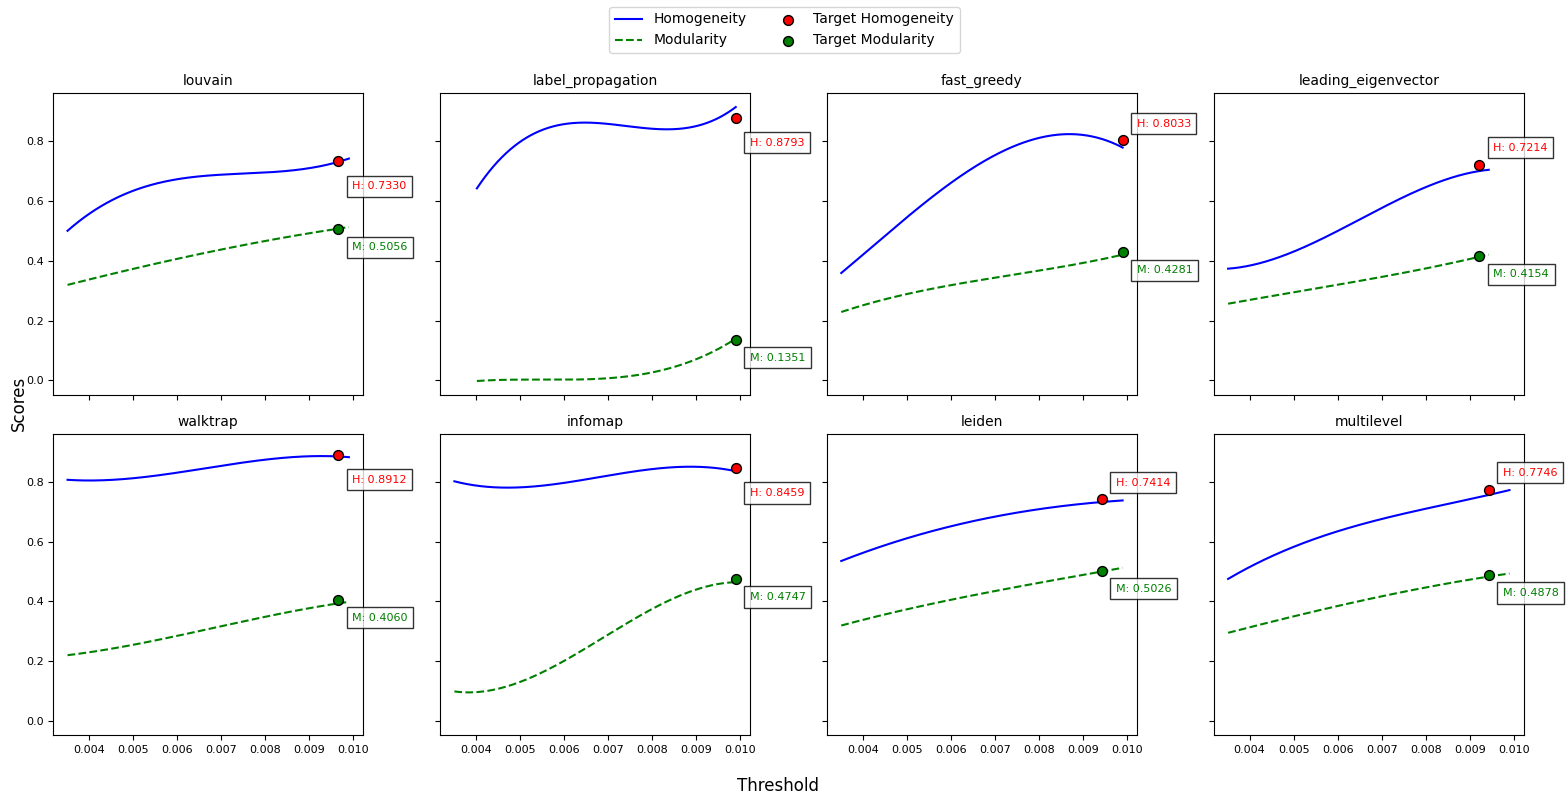

In [36]:
def plot_compact(data, algorithms, target_threshold=[]):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharex=True, sharey=True)
    axes = axes.flatten()

    for idx, algo in enumerate(algorithms):
        if idx >= len(axes):  
            break

        thresholds = np.array(list(data[algo].keys()))
        homogeneities = np.array([data[algo][threshold]['mean_homogeneity'] for threshold in thresholds])
        modularities = np.array([data[algo][threshold]['modularity'] for threshold in thresholds])

        f1 = np.array([data[algo][threshold]['f1'] for threshold in thresholds])
        nmi = np.array([data[algo][threshold]['nmi'] for threshold in thresholds])
        ari = np.array([data[algo][threshold]['ari'] for threshold in thresholds])

        sorted_indices = np.argsort(thresholds)
        thresholds, homogeneities, modularities = thresholds[sorted_indices], homogeneities[sorted_indices], modularities[sorted_indices]

        smooth_thresholds = np.linspace(thresholds.min(), thresholds.max(), 500)
        p_homogeneity = np.poly1d(np.polyfit(thresholds, homogeneities, 3))
        p_modularity = np.poly1d(np.polyfit(thresholds, modularities, 3))

        axes[idx].plot(smooth_thresholds, p_homogeneity(smooth_thresholds), 'b-', label='Homogeneity')
        axes[idx].plot(smooth_thresholds, p_modularity(smooth_thresholds), 'g--', label='Modularity')
        
        print(idx)
        if idx < len(target_threshold) and target_threshold[idx] in thresholds:
            tgt = target_threshold[idx]
            target_index = np.where(thresholds == tgt)[0][0]
            target_homogeneity = homogeneities[target_index]
            target_modularity = modularities[target_index]

            axes[idx].scatter(tgt, target_homogeneity, color='red', edgecolor='black', zorder=5, label="Target Homogeneity", s=50)
            axes[idx].scatter(tgt, target_modularity, color='green', edgecolor='black', zorder=5, label="Target Modularity", s=50)

            # Dynamic Annotation Placement
            y_min, y_max = axes[idx].get_ylim()
            title_height = y_max - (y_max - y_min) * 0.15  # 15% below the top

            homogeneity_offset = 10 if target_homogeneity < title_height else -20
            modularity_offset = -15 if target_modularity < title_height else -30

            axes[idx].annotate(f'H: {target_homogeneity:.4f}', (tgt, target_homogeneity),
                               textcoords="offset points", xytext=(10, homogeneity_offset), fontsize=8,
                               ha='left', color='red', bbox=dict(facecolor='white', alpha=0.8))
            
            axes[idx].annotate(f'M: {target_modularity:.4f}', (tgt, target_modularity),
                               textcoords="offset points", xytext=(10, modularity_offset), fontsize=8,
                               ha='left', color='green', bbox=dict(facecolor='white', alpha=0.8))
            
        axes[idx].set_title(algo, fontsize=10)
        axes[idx].tick_params(axis='both', which='major', labelsize=8)

    fig.supxlabel("Threshold", fontsize=12)
    fig.supylabel("Scores", fontsize=12)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


plot_compact(existing_metrics, community_detection_algorithms[:8], 
             target_threshold=[0.00965965965965966, 0.0098998998998999, 0.0098998998998999, 0.009219219219219218, 0.00965965965965966, 0.0098998998998999, 0.009429429429429429, 0.009429429429429429])


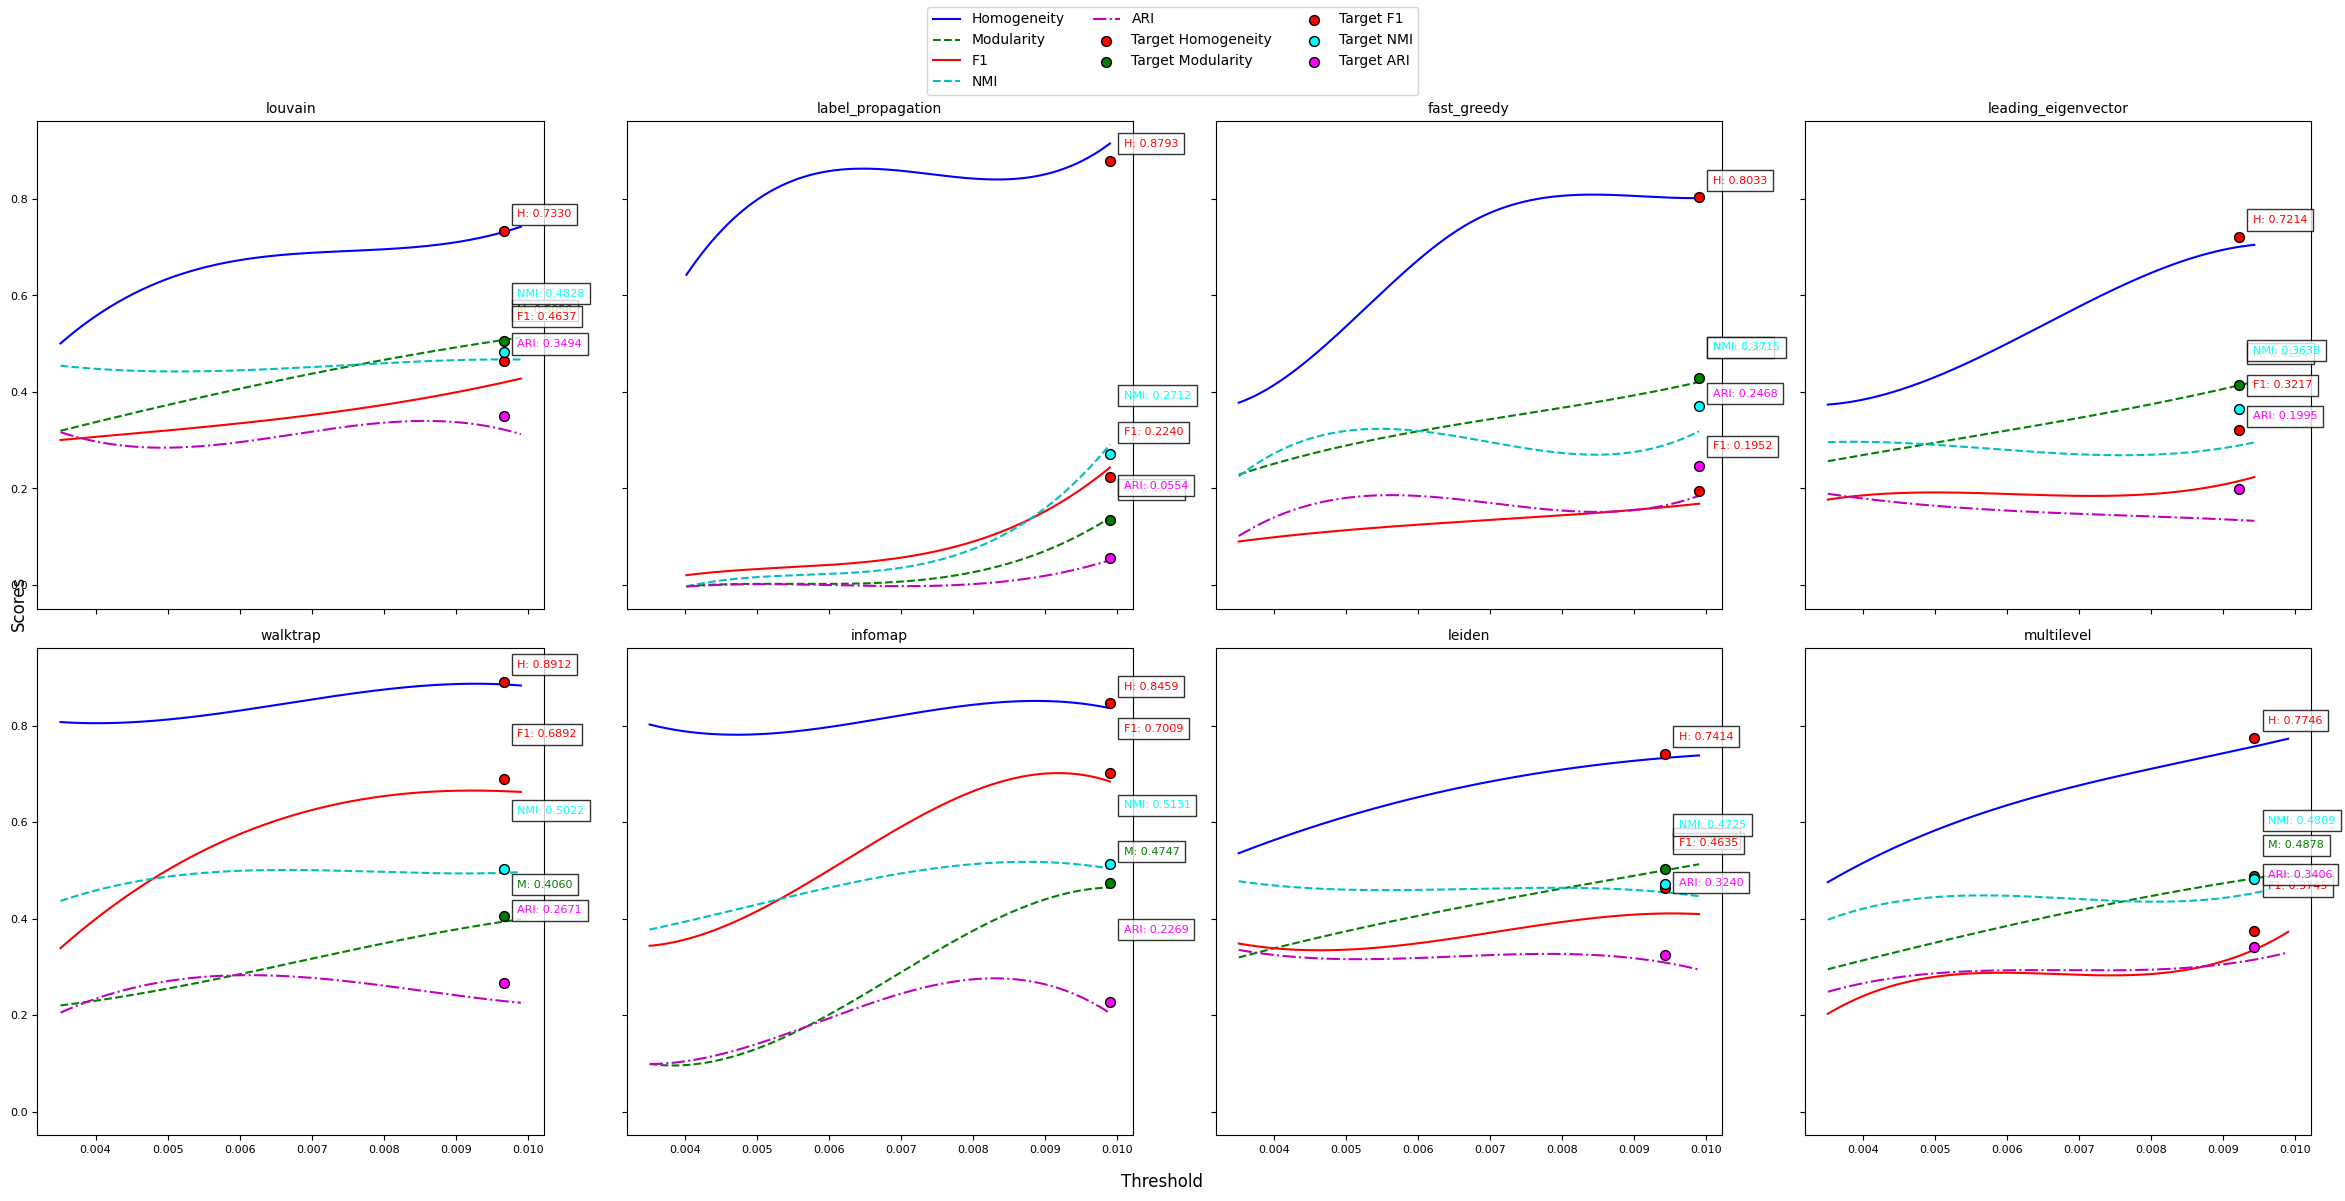

In [37]:
from scipy.interpolate import UnivariateSpline

def plot_compact_v2(data, algorithms, target_threshold=[]):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12), sharex=True, sharey=True)
    axes = axes.flatten()

    for idx, algo in enumerate(algorithms):
        if idx >= len(axes):  
            break

        thresholds = np.array(list(data[algo].keys()))
        homogeneities = np.array([data[algo][threshold]['mean_homogeneity'] for threshold in thresholds])
        modularities = np.array([data[algo][threshold]['modularity'] for threshold in thresholds])
        f1 = np.array([data[algo][threshold]['f1'] for threshold in thresholds])
        nmi = np.array([data[algo][threshold]['nmi'] for threshold in thresholds])
        ari = np.array([data[algo][threshold]['ari'] for threshold in thresholds])

        sorted_indices = np.argsort(thresholds)
        thresholds, homogeneities, modularities, f1, nmi, ari = (
            thresholds[sorted_indices], homogeneities[sorted_indices], modularities[sorted_indices],
            f1[sorted_indices], nmi[sorted_indices], ari[sorted_indices]
        )

        smooth_thresholds = np.linspace(thresholds.min(), thresholds.max(), 500)
        spline_homogeneity = UnivariateSpline(thresholds, homogeneities, s=0.2)  # 's' controls smoothness
        spline_modularity = UnivariateSpline(thresholds, modularities, s=0.2)
        spline_f1 = UnivariateSpline(thresholds, f1, s=0.2)
        spline_nmi = UnivariateSpline(thresholds, nmi, s=0.2)
        spline_ari = UnivariateSpline(thresholds, ari, s=0.2)

        # Plot Homogeneity, Modularity, F1, NMI, ARI
        axes[idx].plot(smooth_thresholds, spline_homogeneity(smooth_thresholds), 'b-', label='Homogeneity')
        axes[idx].plot(smooth_thresholds, spline_modularity(smooth_thresholds), 'g--', label='Modularity')
        axes[idx].plot(smooth_thresholds, spline_f1(smooth_thresholds), 'r-', label='F1')
        axes[idx].plot(smooth_thresholds, spline_nmi(smooth_thresholds), 'c--', label='NMI')
        axes[idx].plot(smooth_thresholds, spline_ari(smooth_thresholds), 'm-.', label='ARI')

        if idx < len(target_threshold) and target_threshold[idx] in thresholds:
            tgt = target_threshold[idx]
            target_index = np.where(thresholds == tgt)[0][0]
            target_homogeneity = homogeneities[target_index]
            target_modularity = modularities[target_index]
            target_f1 = f1[target_index]
            target_nmi = nmi[target_index]
            target_ari = ari[target_index]

            axes[idx].scatter(tgt, target_homogeneity, color='red', edgecolor='black', zorder=5, label="Target Homogeneity", s=50)
            axes[idx].scatter(tgt, target_modularity, color='green', edgecolor='black', zorder=5, label="Target Modularity", s=50)
            axes[idx].scatter(tgt, target_f1, color='red', edgecolor='black', zorder=5, label="Target F1", s=50)
            axes[idx].scatter(tgt, target_nmi, color='cyan', edgecolor='black', zorder=5, label="Target NMI", s=50)
            axes[idx].scatter(tgt, target_ari, color='magenta', edgecolor='black', zorder=5, label="Target ARI", s=50)

            # Dynamic Annotation Placement
            y_min, y_max = axes[idx].get_ylim()
            title_height = y_max - (y_max - y_min) * 0.15  # 15% below the top

            # Set a dynamic vertical offset for each annotation
            annotations = {
                'H': target_homogeneity,
                'M': target_modularity,
                'F1': target_f1,
                'NMI': target_nmi,
                'ARI': target_ari
            }

            offset_y = 0
            prev_offset = 0  # Track the previous y-offset

            for label, value in annotations.items():
                offset = prev_offset + 10  # Start with a base offset
                prev_offset = offset  # Update the previous offset
                
                # Ensure annotations do not overlap by adjusting their position
                while offset < title_height and abs(value - (prev_offset)) < 15:
                    offset += 15

                axes[idx].annotate(f'{label}: {value:.4f}', (tgt, value),
                                   textcoords="offset points", xytext=(10, offset), fontsize=8,
                                   ha='left', color='red' if label == 'H' else ('green' if label == 'M' else 
                                                                               'red' if label == 'F1' else 
                                                                               ('cyan' if label == 'NMI' else 'magenta')),
                                   bbox=dict(facecolor='white', alpha=0.8))

        axes[idx].set_title(algo, fontsize=10)
        axes[idx].tick_params(axis='both', which='major', labelsize=8)

    fig.supxlabel("Threshold", fontsize=12)
    fig.supylabel("Scores", fontsize=12)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

plot_compact_v2(existing_metrics, community_detection_algorithms[:8], 
             target_threshold=[0.00965965965965966, 0.0098998998998999, 0.0098998998998999, 0.009219219219219218, 0.00965965965965966, 0.0098998998998999, 0.009429429429429429, 0.009429429429429429])


In [35]:
existing_metrics

defaultdict(<function __main__.<lambda>()>,
            {'louvain': defaultdict(dict,
                         {0.0036136136136136134: {'modularity': 0.32670193800336916,
                           'mean_homogeneity': 0.567524307286131,
                           'median_homogeneity': 0.5973597359735974,
                           'nmi': 0.4552344961944519,
                           'ari': 0.30738549615433614,
                           'f1': 0.3149692429101801},
                          0.004194194194194194: {'modularity': 0.344874516738148,
                           'mean_homogeneity': 0.5453191795004688,
                           'median_homogeneity': 0.5684704296895247,
                           'nmi': 0.44842479415159714,
                           'ari': 0.2955713490594143,
                           'f1': 0.31697969854939123},
                          0.004824824824824825: {'modularity': 0.36626410988010794,
                           'mean_homogeneity': 0.597532462911408,

In [33]:
def find_best_metrics(metrics):
    best_thresholds = {}

    # Identify best threshold for each algorithm
    for algorithm in metrics:
        best_threshold = None
        best_score = float('-inf')  # Initialize with the lowest possible score
        
        for threshold in metrics[algorithm]:
            # Calculate the overall score (sum of selected metrics)
            score = (
                metrics[algorithm][threshold]["modularity"]
                + metrics[algorithm][threshold]["mean_homogeneity"]
                + metrics[algorithm][threshold]["nmi"]
                + metrics[algorithm][threshold]["ari"]
                + metrics[algorithm][threshold]["f1"]
            )

            # Update best threshold if the score improves
            if score > best_score:
                best_score = score
                best_threshold = threshold

        best_thresholds[algorithm] = best_threshold

        # Print all metrics for the best threshold
        best_metrics = metrics[algorithm][best_threshold]
        print(f"Best threshold for {algorithm}: {best_threshold}")
        print(f"Modularity: {best_metrics['modularity']}")
        print(f"Mean Homogeneity: {best_metrics['mean_homogeneity']}")
        print(f"NMI: {best_metrics['nmi']}")
        print(f"ARI: {best_metrics['ari']}")
        print(f"F1: {best_metrics['f1']}")
        print("="*50)

# find_best_metrics(metrics)
find_best_metrics(existing_metrics)

Best threshold for louvain: 0.00965965965965966
Modularity: 0.5056005416088185
Mean Homogeneity: 0.7330496526901759
NMI: 0.4827772852614224
ARI: 0.34936262010717334
F1: 0.46374774899963794
Best threshold for fast_greedy: 0.0098998998998999
Modularity: 0.4280573597414354
Mean Homogeneity: 0.8032676173408562
NMI: 0.3715060948795648
ARI: 0.2468127061182016
F1: 0.19517788212912096
Best threshold for leading_eigenvector: 0.009219219219219218
Modularity: 0.4153534518083407
Mean Homogeneity: 0.7214327058450576
NMI: 0.3637528320673037
ARI: 0.19952350185947196
F1: 0.3217386318183051
Best threshold for walktrap: 0.00965965965965966
Modularity: 0.4060421504071364
Mean Homogeneity: 0.8911725899708727
NMI: 0.5021616866369929
ARI: 0.26709660359836557
F1: 0.6892322152505136
Best threshold for label_propagation: 0.0098998998998999
Modularity: 0.13505145343424632
Mean Homogeneity: 0.879281029751276
NMI: 0.2711682299593132
ARI: 0.05535585818152486
F1: 0.22399178979737508
Best threshold for infomap: 0.00

In [ ]:
# save all graphs in l2_graphs folder
for threshold, graph in graphs.items():
    nx.write_graphml(graph, f'../l2_graphs/{threshold}.graphml')